In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.cross_validation import train_test_split
import numpy as np
import seaborn as sns

In [197]:
import os
print("Hello")
cwd = os.getcwd()
print("current working directory",cwd)
os.chdir('D:\BUSINESS ANALYTICS')
print (os.getcwd())

Hello
current working directory D:\BUSINESS ANALYTICS
D:\BUSINESS ANALYTICS


In [198]:
df= pd.read_csv('Tweets.csv')

In [199]:
df.shape

(14640, 15)

In [200]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [201]:
df.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

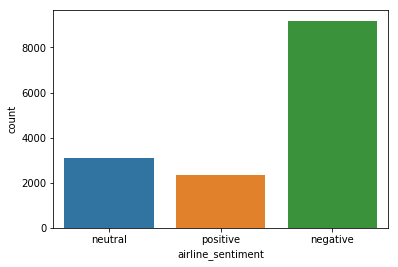

In [202]:
sns.countplot(x='airline_sentiment', data=df)

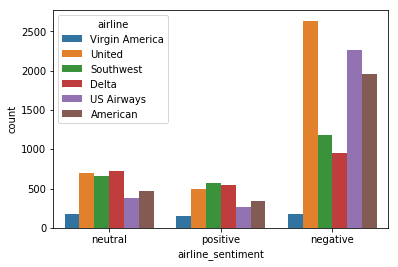

In [203]:
sns.countplot(x='airline_sentiment', hue='airline', data=df)

In [204]:
df.airline.value_counts()


United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

Text(0,0.5,'No. of Tweets')

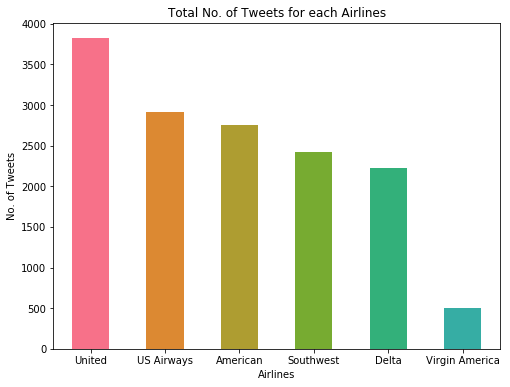

In [205]:
colors=sns.color_palette("husl", 10) 
pd.Series(df["airline"]).value_counts().plot(kind = "bar",
                        color=colors,figsize=(8,6),fontsize=10,rot = 0, title = "Total No. of Tweets for each Airlines")
plt.xlabel('Airlines', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

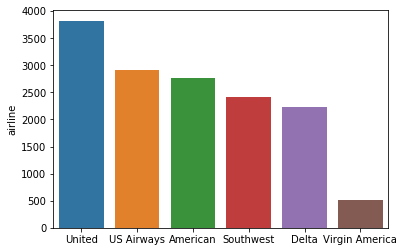

In [206]:
sns.barplot(x=df.airline.value_counts().index, y=df.airline.value_counts())


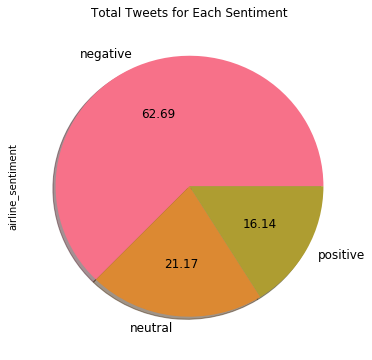

In [207]:
colors=sns.color_palette("husl", 10)
pd.Series(df["airline_sentiment"]).value_counts().plot(kind="pie",colors=colors,
    labels=["negative", "neutral", "positive"],
    shadow=True,autopct='%.2f', fontsize=12,figsize=(6, 6),title = "Total Tweets for Each Sentiment")

In [208]:
count_tweets =df.airline_sentiment.value_counts()

In [209]:
print(count_tweets)

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


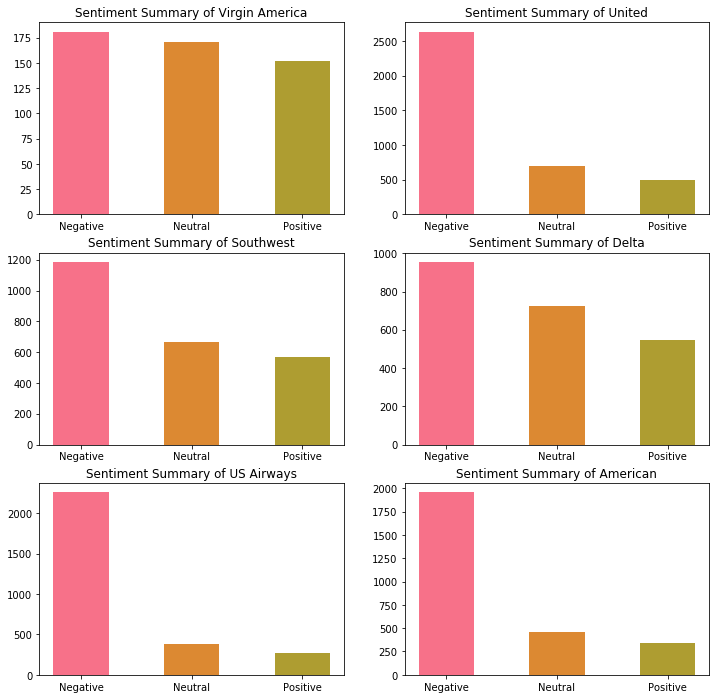

In [172]:
def plot_sub_sentiment(Airline):
    pdf = df[df['airline']==Airline]
    count = pdf['airline_sentiment'].value_counts()
    Index = [1,2,3]
    color=sns.color_palette("husl", 10)
    plt.bar(Index,count,width=0.5,color=color)
    plt.xticks(Index,['Negative','Neutral','Positive'])
    plt.title('Sentiment Summary of' + " " + Airline)

airline_name = df['airline'].unique()
plt.figure(1,figsize=(12,12))
for i in range(6):
    plt.subplot(3,2,i+1)
    plot_sub_sentiment(airline_name[i])



In [35]:
airline_name

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [210]:
df.negativereason.value_counts().head(5)


Customer Service Issue    2910
Late Flight               1665
Can't Tell                1190
Cancelled Flight           847
Lost Luggage               724
Name: negativereason, dtype: int64

Text(0,0.5,'No. of Tweets')

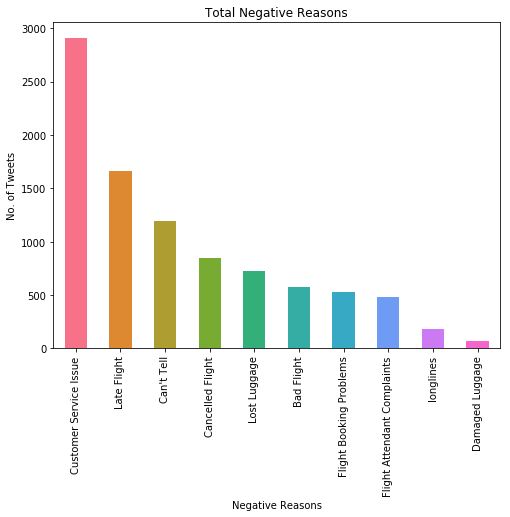

In [211]:
color=sns.color_palette("husl", 10)
pd.Series(df["negativereason"]).value_counts().plot(kind = "bar",
                        color=color,figsize=(8,6),title = "Total Negative Reasons")
plt.xlabel('Negative Reasons', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

In [212]:
sentiment=pd.crosstab(df.airline, df.airline_sentiment)
sentiment

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


In [213]:
percent=sentiment.apply(lambda a: a / a.sum() * 100, axis=1)
percent

airline_sentiment,negative,neutral,positive
airline,,,
American,71.040232,16.781443,12.178325
Delta,42.979298,32.538254,24.482448
Southwest,49.008264,27.438017,23.553719
US Airways,77.686234,13.079300,9.234466
United,68.890633,18.236525,12.872841
Virgin America,35.912698,33.928571,30.158730


In [214]:
df['tweet_created'] = pd.to_datetime(df['tweet_created'])
df["date_created"] = df["tweet_created"].dt.date



In [215]:
df1 = df.groupby(['date_created','airline'])


In [216]:
df1 = df1.airline_sentiment.value_counts()
df1.unstack()

airline_sentiment            negative  neutral  positive
date_created airline                                    
2015-02-17   Delta               51.0     63.0      47.0
             Southwest          162.0     69.0      56.0
             US Airways         156.0     22.0      33.0
             United             173.0     50.0      29.0
             Virgin America      10.0     16.0      16.0
2015-02-18   Delta              127.0     84.0      78.0
             Southwest          143.0     96.0      90.0
             US Airways         259.0     29.0      44.0
             United             281.0     74.0      53.0
             Virgin America      17.0     21.0      20.0
2015-02-19   American             1.0      NaN       1.0
             Delta              127.0     68.0      74.0
             Southwest          103.0    102.0      86.0
             US Airways         189.0     58.0      34.0
             United             224.0     97.0      71.0
             Virgin America      22.0     21.0      20.0
2015-02-20   American             1.0      NaN       NaN
             Delta              108.0     97.0      78.0
             Southwest          139.0     98.0      73.0
             US Airways         234.0     50.0      34.0
             United             347.0    104.0      78.0
             Virgin America      20.0     34.0      17.0
2015-02-21   American             1.0      NaN       NaN
             Delta               91.0     78.0      55.0
             Southwest          219.0     77.0      64.0
             US Airways         224.0     31.0      26.0
             United             333.0     72.0      72.0
             Virgin America      33.0     14.0      28.0
2015-02-22   American           316.0     46.0      42.0
             Delta              221.0     82.0      83.0
             Southwest          143.0     52.0      53.0
             US Airways         536.0     58.0      28.0
             United             494.0    109.0      63.0
             Virgin America      34.0     20.0      12.0
2015-02-23   American          1071.0    214.0     144.0
             Delta              160.0    181.0      83.0
             Southwest          151.0    107.0      94.0
             US Airways         431.0     76.0      46.0
             United             503.0    103.0      71.0
             Virgin America      30.0     30.0      20.0
2015-02-24   American           570.0    203.0     149.0
             Delta               70.0     70.0      46.0
             Southwest          126.0     63.0      54.0
             US Airways         234.0     57.0      24.0
             United             278.0     88.0      55.0
             Virgin America      15.0     15.0      19.0

In [217]:
import nltk
from nltk.corpus import stopwords
def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet)
    ##print(letters_only)
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))


In [218]:

def clean_tweet_length(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words))

In [219]:
df['sentiment']=df['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)


In [220]:
df['sentiment'].head()

0    1
1    1
2    1
3    0
4    0
Name: sentiment, dtype: int64

In [241]:

df['clean_tweet']=df['text'].apply(lambda x: tweet_to_words(x))
df['Tweet_length']=df['text'].apply(lambda x: clean_tweet_length(x))

train,test = train_test_split(df,test_size=0.2,random_state=42)

train_clean_tweet=[]
for tweets in train['clean_tweet']:
    train_clean_tweet.append(tweets)
test_clean_tweet=[]
for tweets in test['clean_tweet']:
    test_clean_tweet.append(tweets)

from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)

df.columns = df.columns.str.strip()

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB()]

dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))


Accuracy of LogisticRegression is 0.6451502732240437
Accuracy of KNeighborsClassifier is 0.5891393442622951
Accuracy of SVC is 0.6451502732240437
Accuracy of DecisionTreeClassifier is 0.7633196721311475
Accuracy of RandomForestClassifier is 0.8183060109289617
Accuracy of AdaBoostClassifier is 0.7855191256830601
Accuracy of GaussianNB is 0.5724043715846995


In [236]:
train_features

<11712x11919 sparse matrix of type '<class 'numpy.int64'>'
	with 113748 stored elements in Compressed Sparse Row format>

In [237]:
print(train_features)

  (0, 3506)	1
  (0, 7185)	1
  (0, 7604)	1
  (0, 8849)	1
  (0, 10884)	1
  (0, 11008)	1
  (1, 355)	1
  (1, 2630)	1
  (1, 2726)	1
  (1, 3157)	1
  (1, 3443)	1
  (1, 5360)	2
  (1, 5365)	1
  (1, 5387)	1
  (1, 5785)	1
  (1, 7123)	1
  (1, 9174)	1
  (1, 9736)	1
  (2, 2289)	1
  (2, 2706)	1
  (2, 3672)	1
  (2, 5360)	1
  (2, 5556)	1
  (2, 5757)	1
  (2, 5817)	1
  :	:
  (11709, 9572)	1
  (11709, 9616)	1
  (11710, 2109)	1
  (11710, 2349)	1
  (11710, 2749)	1
  (11710, 3445)	1
  (11710, 4182)	1
  (11710, 7832)	1
  (11710, 9202)	1
  (11710, 9304)	1
  (11710, 10884)	1
  (11710, 11613)	2
  (11711, 613)	1
  (11711, 785)	1
  (11711, 4416)	1
  (11711, 5360)	2
  (11711, 5913)	1
  (11711, 7211)	1
  (11711, 9146)	1
  (11711, 9166)	1
  (11711, 9172)	1
  (11711, 10006)	1
  (11711, 10720)	1
  (11711, 11008)	3
  (11711, 11338)	1
